In [1]:
%run carbon_tracker.py

[codecarbon INFO @ 16:25:30] offline tracker init
[codecarbon WARNING @ 16:25:30] Multiple instances of codecarbon are allowed to run at the same time.


In [2]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
update_project_name("features Engineering")

[codecarbon ERROR @ 16:25:36] You first need to start the tracker.


In [5]:
start_tracker()

In [6]:
import pandas as pd 
import seaborn as sns
import numpy as np

In [7]:
depression_dataset = pd.read_csv("final_depression_dataset_1.csv")
depression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [8]:
depression_dataset.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [9]:
depression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [10]:
len(depression_dataset)

2556

In [11]:
depression_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2556.0,39.043036,12.260596,18.00,28.00,39.000,50.000,60.0
Academic Pressure,502.0,3.003984,1.390007,1.00,2.00,3.000,4.000,5.0
Work Pressure,2054.0,3.021908,1.417312,1.00,2.00,3.000,4.000,5.0
CGPA,502.0,7.567809,1.465367,5.03,6.21,7.605,8.825,10.0
Study Satisfaction,502.0,3.075697,1.373490,1.00,2.00,3.000,4.000,5.0
Job Satisfaction,2054.0,3.015093,1.418432,1.00,2.00,3.000,4.000,5.0
Work/Study Hours,2556.0,6.023865,3.771743,0.00,3.00,6.000,9.000,12.0
Financial Stress,2556.0,2.968701,1.415527,1.00,2.00,3.000,4.000,5.0


In [12]:
#les colones Study Satisfaction ,tudy Satisfaction,CGPA on presque tous des valeur nuls
depression_dataset=depression_dataset.drop(columns=["City", "Name","Study Satisfaction","CGPA", "Academic Pressure","Profession","Degree"], axis =1)

In [13]:
colones = depression_dataset.columns
colones

Index(['Gender', 'Age', 'Working Professional or Student', 'Work Pressure',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [14]:
# liste des colones qui ont uniquement 2 valeurs possible
for colone in colones:
    possible_values = depression_dataset[colone].unique()
    if len(possible_values) == 2 :
        
        print(f"{colone} : {possible_values }")

Gender : ['Female' 'Male']
Working Professional or Student : ['Working Professional' 'Student']
Have you ever had suicidal thoughts ? : ['No' 'Yes']
Family History of Mental Illness : ['No' 'Yes']
Depression : ['No' 'Yes']


In [15]:
# Numerisation des données

depression_dataset["Gender"] = depression_dataset["Gender"].map({"Female": 0, "Male": 1})
depression_dataset["Have you ever had suicidal thoughts ?"] = depression_dataset["Have you ever had suicidal thoughts ?"].map({"No": 0, "Yes": 1})
depression_dataset["Family History of Mental Illness"] = depression_dataset["Family History of Mental Illness"].map({"No": 0, "Yes": 1})
depression_dataset["Depression"] = depression_dataset["Depression"].map({"No": 0, "Yes": 1})
depression_dataset["Working Professional or Student"] = depression_dataset["Working Professional or Student"].map({"Student": 0, "Working Professional": 1})

In [16]:
depression_dataset

,Gender,Age,Working Professional or Student,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,37,1,2.0,4.0,7-8 hours,Moderate,0,6,2,0,0
1,1,60,1,4.0,3.0,5-6 hours,Unhealthy,1,0,4,1,0
2,0,42,1,2.0,3.0,5-6 hours,Moderate,0,0,2,0,0
3,0,44,1,3.0,5.0,7-8 hours,Healthy,1,1,2,1,0
4,1,48,1,4.0,3.0,7-8 hours,Moderate,1,6,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1,25,1,1.0,5.0,5-6 hours,Healthy,1,12,3,1,0
2552,0,23,1,3.0,1.0,Less than 5 hours,Moderate,1,8,3,0,1
2553,0,24,1,1.0,4.0,Less than 5 hours,Moderate,1,4,4,0,0
2554,0,56,1,2.0,3.0,7-8 hours,Healthy,0,4,5,1,0


In [17]:
#changement du nom de la colone Have you ever had suicidal thoughts ?

depression_dataset = depression_dataset.rename(columns={'Have you ever had suicidal thoughts ?': 'suicidal thoughts'})

In [18]:
# categorisation de l'age
bins = [18, 25, 35, 45, 60]  # Intervalles
labels = ["Jeune adulte", "Adulte", "Adulte mature", "Senior actif"]

# Création de la nouvelle colonne
depression_dataset['Age'] = pd.cut(depression_dataset['Age'], bins=bins, labels=labels, right=True)

In [19]:
#verification des valeur possible de  sleep duration
depression_dataset["Sleep Duration"].unique()

array(['7-8 hours', '5-6 hours', 'More than 8 hours', 'Less than 5 hours'],
      dtype=object)

In [20]:
#catergorisation des heure de sommeil
sleep_mapping = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 5
}

# Appliquer la classification
depression_dataset['Sleep Duration'] = depression_dataset['Sleep Duration'].map(sleep_mapping)

In [21]:
depression_dataset["Dietary Habits"].unique()

array(['Moderate', 'Unhealthy', 'Healthy'], dtype=object)

In [22]:
#catergorisation de Dietary Habits
Dietary_Habits_mapping = {"Unhealthy":0, "Moderate":1, "Healthy": 2}
depression_dataset["Dietary Habits"] = depression_dataset["Dietary Habits"].map(Dietary_Habits_mapping)


In [23]:
# Dummification
depression_dataset_dummies = pd.get_dummies(depression_dataset, columns=['Age'], dtype='int')

depression_dataset= depression_dataset_dummies

In [24]:
depression_dataset.head()

,Gender,Working Professional or Student,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,suicidal thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Age_Jeune adulte,Age_Adulte,Age_Adulte mature,Age_Senior actif
0,0,1,2.0,4.0,3,1,0,6,2,0,0,0,0,1,0
1,1,1,4.0,3.0,2,0,1,0,4,1,0,0,0,0,1
2,0,1,2.0,3.0,2,1,0,0,2,0,0,0,0,1,0
3,0,1,3.0,5.0,3,2,1,1,2,1,0,0,0,1,0
4,1,1,4.0,3.0,3,1,1,6,5,1,0,0,0,0,1


In [25]:
depression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            2556 non-null   int64  
 1   Working Professional or Student   2556 non-null   int64  
 2   Work Pressure                     2054 non-null   float64
 3   Job Satisfaction                  2054 non-null   float64
 4   Sleep Duration                    2556 non-null   int64  
 5   Dietary Habits                    2556 non-null   int64  
 6   suicidal thoughts                 2556 non-null   int64  
 7   Work/Study Hours                  2556 non-null   int64  
 8   Financial Stress                  2556 non-null   int64  
 9   Family History of Mental Illness  2556 non-null   int64  
 10  Depression                        2556 non-null   int64  
 11  Age_Jeune adulte                  2556 non-null   int64  
 12  Age_Ad

In [26]:
depression_dataset.isnull().sum()

Gender                                0
Working Professional or Student       0
Work Pressure                       502
Job Satisfaction                    502
Sleep Duration                        0
Dietary Habits                        0
suicidal thoughts                     0
Work/Study Hours                      0
Financial Stress                      0
Family History of Mental Illness      0
Depression                            0
Age_Jeune adulte                      0
Age_Adulte                            0
Age_Adulte mature                     0
Age_Senior actif                      0
dtype: int64

In [27]:
update_project_name("entrainement du model")

In [28]:
#remplacer les valleur manquante de Job Satisfaction et de Work Pressure par leurs moyennes
depression_dataset["Work Pressure"].fillna(depression_dataset["Work Pressure"].mean(), inplace=True)
depression_dataset["Job Satisfaction"].fillna(depression_dataset["Job Satisfaction"].mean(), inplace=True)


C:\Users\evans\AppData\Local\Temp\ipykernel_24784\1562799756.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  depression_dataset["Work Pressure"].fillna(depression_dataset["Work Pressure"].mean(), inplace=True)
C:\Users\evans\AppData\Local\Temp\ipykernel_24784\1562799756.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [29]:
depression_dataset.isnull().sum()

Gender                              0
Working Professional or Student     0
Work Pressure                       0
Job Satisfaction                    0
Sleep Duration                      0
Dietary Habits                      0
suicidal thoughts                   0
Work/Study Hours                    0
Financial Stress                    0
Family History of Mental Illness    0
Depression                          0
Age_Jeune adulte                    0
Age_Adulte                          0
Age_Adulte mature                   0
Age_Senior actif                    0
dtype: int64

<Axes: >

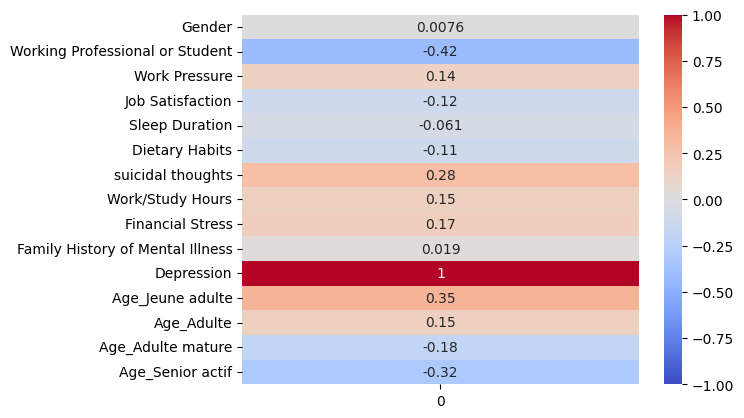

In [30]:
correlation = depression_dataset.corrwith(depression_dataset["Depression"] )


sns.heatmap(correlation.to_frame(), annot=True ,cmap='coolwarm', vmin=-1, vmax=1)

In [31]:
correlation.sort_values()

Working Professional or Student    -0.418708
Age_Senior actif                   -0.319816
Age_Adulte mature                  -0.180492
Job Satisfaction                   -0.116713
Dietary Habits                     -0.108215
Sleep Duration                     -0.061173
Gender                              0.007595
Family History of Mental Illness    0.019182
Work Pressure                       0.138133
Work/Study Hours                    0.152465
Age_Adulte                          0.154038
Financial Stress                    0.165669
suicidal thoughts                   0.281669
Age_Jeune adulte                    0.354983
Depression                          1.000000
dtype: float64

In [32]:
# liste des colone qui ne sont pas fortement corelé avec Depression
low_correlation = correlation[abs(correlation) < 0.1].index
low_correlation

Index(['Gender', 'Sleep Duration', 'Family History of Mental Illness'], dtype='object')

In [33]:
depression_dataset.head(1)

,Gender,Working Professional or Student,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,suicidal thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Age_Jeune adulte,Age_Adulte,Age_Adulte mature,Age_Senior actif
0,0,1,2.0,4.0,3,1,0,6,2,0,0,0,0,1,0


In [34]:
#donne final
depression_dataset_ = depression_dataset.drop(columns=low_correlation)

In [35]:
depression_dataset_.head(1)

,Working Professional or Student,Work Pressure,Job Satisfaction,Dietary Habits,suicidal thoughts,Work/Study Hours,Financial Stress,Depression,Age_Jeune adulte,Age_Adulte,Age_Adulte mature,Age_Senior actif
0,1,2.0,4.0,1,0,6,2,0,0,0,1,0


<Axes: >

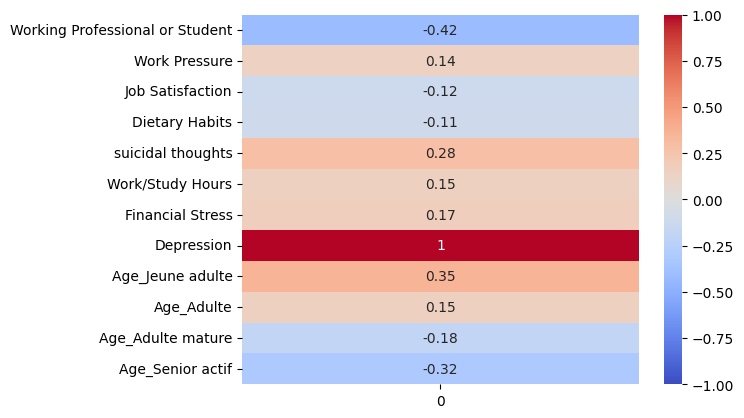

In [36]:
correlation = depression_dataset_.corrwith(depression_dataset["Depression"] )


sns.heatmap(correlation.to_frame(), annot=True ,cmap='coolwarm', vmin=-1, vmax=1)

## Utilisons le model de regression Logistique

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
X = depression_dataset_.drop('Depression', axis=1)
y = depression_dataset_['Depression']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=101, stratify=y)

In [40]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix,classification_report

In [42]:
log_model = LogisticRegression()

In [43]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [44]:
y_pred = log_model.predict(scaled_X_test)


In [45]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [46]:
print(accuracy_score(y_test, y_pred))
logloss_error = log_loss(y_test, y_pred)
logloss_error

0.90625


3.3790925052297327

<Axes: >

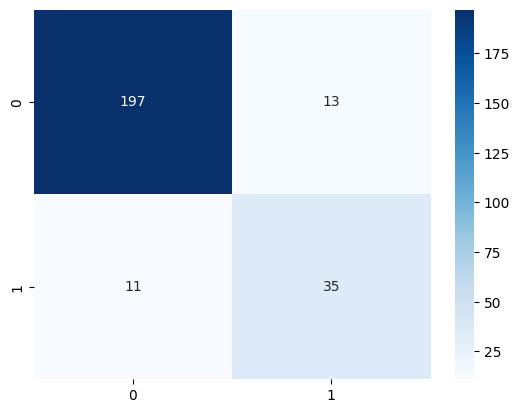

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='d', cmap='Blues')


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       210
           1       0.73      0.76      0.74        46

    accuracy                           0.91       256
   macro avg       0.84      0.85      0.84       256
weighted avg       0.91      0.91      0.91       256



## Amelioration du model

In [49]:
print(depression_dataset_["Depression"].value_counts(normalize=True)*100)



Depression
0    82.198748
1    17.801252
Name: proportion, dtype: float64


In [50]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.array([0,1]), y=depression_dataset_["Depression"])

print(class_weights)

[0.60828177 2.80879121]


In [51]:
class_weight_dict = {0: class_weights[0], 1: class_weights[1]} 
class_weight_dict

{0: np.float64(0.6082817705854355), 1: np.float64(2.8087912087912086)}

In [52]:
log_model = LogisticRegression( class_weight=class_weight_dict)

In [53]:
log_model.fit(scaled_X_train, y_train)
y_pred = log_model.predict(scaled_X_test)

In [54]:
print(accuracy_score(y_test, y_pred))
logloss_error = log_loss(y_test, y_pred)
logloss_error

0.90234375


3.519888026280972

In [56]:
tracker.stop()

[codecarbon ERROR @ 16:26:43] You first need to start the tracker.


In [55]:
emissions = pd.read_csv("./emissions/emissions.csv")
emissions

,timestamp,project_name,run_id,experiment_id,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,...,cpu_count,cpu_model,gpu_count,gpu_model,longitude,latitude,ram_total_size,tracking_mode,on_cloud,pue
0,2025-02-03T14:27:43,Hackathon 2 - Data/IA - Groupe 0 - depression,e56a8fb2-f527-4bd0-85e9-d71d63768526,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,105.647106,7.957390e-05,7.532048e-07,42.5,0.0,5.898877,...,12,13th Gen Intel(R) Core(TM) i7-1355U,NaN,NaN,NaN,NaN,15.730339,machine,N,1.0
1,2025-02-03T23:40:29,Hackathon 2 - Data/IA - Groupe 0 - features En...,ba819bbd-062b-4c78-a76d-c8fee3827bf3,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,2866.577701,2.159298e-03,7.532668e-07,42.5,0.0,5.898877,...,12,13th Gen Intel(R) Core(TM) i7-1355U,NaN,NaN,NaN,NaN,15.730339,machine,N,1.0
2,2025-02-04T12:40:46,Hackathon 2 - Data/IA - Groupe 0 - features En...,1c31d2e0-a05f-46c7-8d75-0c39d8f4a74a,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,4161.299191,3.134593e-03,7.532727e-07,42.5,0.0,5.898877,...,12,13th Gen Intel(R) Core(TM) i7-1355U,NaN,NaN,NaN,NaN,15.730339,machine,N,1.0
3,2025-02-04T14:02:35,Hackathon 2 - Data/IA - Groupe 0 - features En...,f26950bc-b4ab-479e-a0b5-00d3f77bf6bc,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,0.382181,2.869529e-07,7.508306e-07,42.5,0.0,5.898877,...,12,13th Gen Intel(R) Core(TM) i7-1355U,NaN,NaN,NaN,NaN,15.730339,machine,N,1.0
4,2025-02-04T16:25:41,Hackathon 2 - Data/IA - Groupe 0 - features En...,24425c14-b111-446d-b599-1d5a6441d1e5,5b0fa12a-3dd7-45bb-9766-cc326314d9f1,3.475991,2.617771e-06,7.531005e-07,42.5,0.0,5.898877,...,12,13th Gen Intel(R) Core(TM) i7-1355U,NaN,NaN,NaN,NaN,15.730339,machine,N,1.0
